# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

metadata = pd.DataFrame(mouse_metadata)
results = pd.DataFrame(study_results)

# Combine the data into a single DataFrame
complete_mouse_data = metadata.merge(results, how="outer", on="Mouse ID")
#reset_index
complete_mouse_data = complete_mouse_data.reset_index()

# Display the data table for preview
complete_mouse_data.head()





,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.
mouse_number = len(complete_mouse_data["Mouse ID"].unique())
mouse_number 

249

In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = complete_mouse_data[complete_mouse_data.duplicated(["Mouse ID", "Timepoint"], keep='first')]
duplicateRows

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,909,g989,Propriva,Female,21,26,0,45.000000,0
911,911,g989,Propriva,Female,21,26,5,47.570392,0
913,913,g989,Propriva,Female,21,26,10,49.880528,0
915,915,g989,Propriva,Female,21,26,15,53.442020,0
917,917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicateMouse = complete_mouse_data.loc[complete_mouse_data['Mouse ID']== "g989", :]
duplicateMouse


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,908,g989,Propriva,Female,21,26,0,45.000000,0
909,909,g989,Propriva,Female,21,26,0,45.000000,0
910,910,g989,Propriva,Female,21,26,5,48.786801,0
911,911,g989,Propriva,Female,21,26,5,47.570392,0
912,912,g989,Propriva,Female,21,26,10,51.745156,0
913,913,g989,Propriva,Female,21,26,10,49.880528,0
914,914,g989,Propriva,Female,21,26,15,51.325852,1
915,915,g989,Propriva,Female,21,26,15,53.442020,0
916,916,g989,Propriva,Female,21,26,20,55.326122,1
917,917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_complete_mouse_data = complete_mouse_data[complete_mouse_data["Mouse ID"] != "g989"]
clean_complete_mouse_data.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Checking the number of mice in the clean DataFrame.
mouse_number = len(clean_complete_mouse_data["Mouse ID"].unique())
mouse_number 

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Mean_Tumor_Volume = clean_complete_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume = clean_complete_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
Tumor_Volume_Variance = clean_complete_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
Tumor_Volume_Std_Dev = clean_complete_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
Tumor_Volume_Std_Err = clean_complete_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

Drug_Regimen_Summary_Long = pd.DataFrame({"Mean Tumor Volume":Mean_Tumor_Volume , "Median Tumor Volume":Median_Tumor_Volume , "Tumor Volume Variance":Tumor_Volume_Variance , "Tumor Volume Std. Dev.":Tumor_Volume_Std_Dev , "Tumor Volume Std. Err.":Tumor_Volume_Std_Err })
Drug_Regimen_Summary_Long

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Groupby & multiple aggregations

Drug_Regimen_Summary_Short = clean_complete_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].aggregate(['mean','median', 'var', 'std', 'sem'])
Drug_Regimen_Summary_Short



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


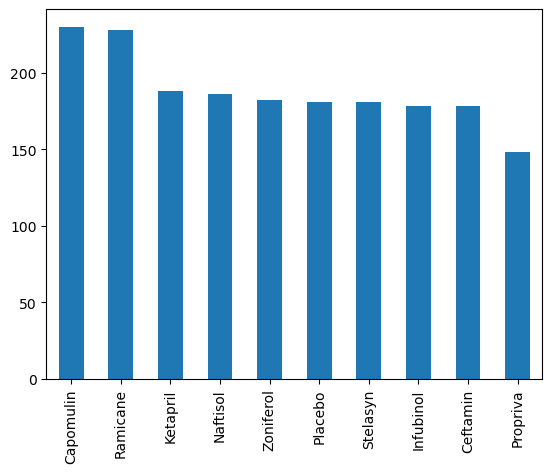

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_complete_mouse_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
print(counts)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


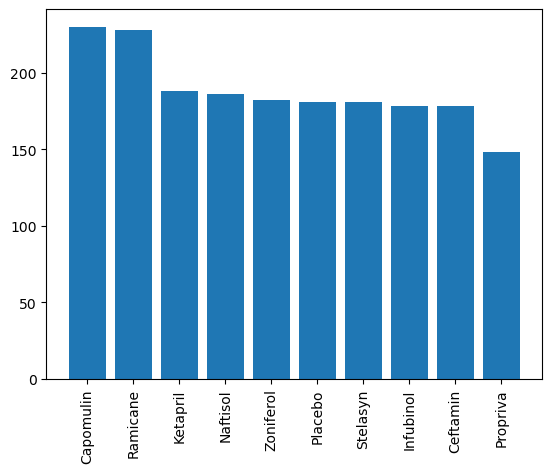

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#timepoints = pd.DataFrame(complete_mouse_data.groupby('Drug Regimen')["Timepoint"].count())


counts = clean_complete_mouse_data['Drug Regimen'].value_counts()

x = counts.index.values
y = counts.values
labels = counts.index.values


plt.bar(x,y)

plt.xticks(x, labels, rotation ='vertical')


print(counts)


         index
Sex           
Female  899155
Male    879741


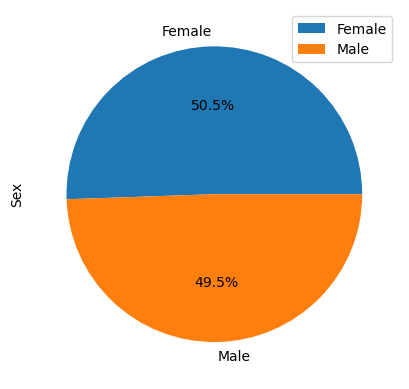

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = pd.DataFrame(clean_complete_mouse_data.groupby("Sex")['index'].sum())

gender.plot.pie(y='index', autopct='%1.1f%%')
plt.ylabel("Sex")

print(gender)

Text(0, 0.5, 'Sex')

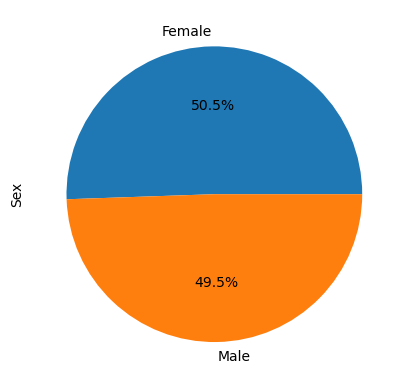

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = pd.DataFrame(clean_complete_mouse_data.groupby("Sex")['index'].sum())
labels = gender.index

plt.pie(gender["index"], labels = labels, autopct='%1.1f%%')

plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_treatments = clean_complete_mouse_data[clean_complete_mouse_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
final_measurement = selected_treatments.groupby(["Mouse ID"])['Timepoint'].max()
final_measurement = final_measurement.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = final_measurement.merge(clean_complete_mouse_data,on=['Mouse ID','Timepoint'],how="left")
final_tumor_volume.head()


,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a275,45,493,Ceftamin,Female,20,28,62.999356,3
3,a411,45,327,Ramicane,Male,3,22,38.407618,1
4,a444,45,430,Ramicane,Female,10,25,43.047543,0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
Ceftamin_Tumors = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']== "Ceftamin", :]
Ceftamin_Tumor_Final_Values = Ceftamin_Tumors['Tumor Volume (mm3)']

ceftamin_quartiles = Ceftamin_Tumor_Final_Values.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

Ceftamin_Outliers=[]

for tumor in Ceftamin_Tumor_Final_Values:
    if ((tumor < ceftamin_lower_bound) | (tumor > ceftamin_upper_bound)):
        Ceftamin_Outliers.append(tumor)
        
print(f"Ceftamin's potential outliers are {Ceftamin_Outliers}")


Infubinol_Tumors = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']== "Infubinol", :]
Infubinol_Tumor_Final_Values = Infubinol_Tumors['Tumor Volume (mm3)']

Infubinol_quartiles = Infubinol_Tumor_Final_Values.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

Infubinol_Outliers=[]

for tumor in Infubinol_Tumor_Final_Values:
    if ((tumor < Infubinol_lower_bound) | (tumor > Infubinol_upper_bound)):
        Infubinol_Outliers.append(tumor)
print(f"Infubinol's upper and lower are {Infubinol_lower_bound, Infubinol_upper_bound}")        
print(f"Infubinol's potential outliers are {Infubinol_Outliers}")

Ramicane_Tumors = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']== "Ramicane", :]
Ramicane_Tumor_Final_Values = Ramicane_Tumors['Tumor Volume (mm3)']

Ramicane_quartiles = Ramicane_Tumor_Final_Values.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)

Ramicane_Outliers=[]

for tumor in Ramicane_Tumor_Final_Values:
    if ((tumor < Ramicane_lower_bound) | (tumor > Ramicane_upper_bound)):
        Ramicane_Outliers.append(tumor)
        
print(f"Ramicane's potential outliers are {Ramicane_Outliers}")

Capomulin_Tumors = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']== "Capomulin", :]
Capomulin_Tumor_Final_Values = Capomulin_Tumors['Tumor Volume (mm3)']

Capomulin_quartiles = Capomulin_Tumor_Final_Values.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

Capomulin_Outliers=[]

for tumor in Capomulin_Tumor_Final_Values:
    if ((tumor < Capomulin_lower_bound) | (tumor > Capomulin_upper_bound)):
        Capomulin_Outliers.append(tumor)
        
print(f"Capomulin's potential outliers are {Capomulin_Outliers}")


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Ceftamin's potential outliers are []
Infubinol's upper and lower are (36.83290494999999, 82.74144559000001)
Infubinol's potential outliers are [36.3213458]
Ramicane's potential outliers are []
Capomulin's potential outliers are []


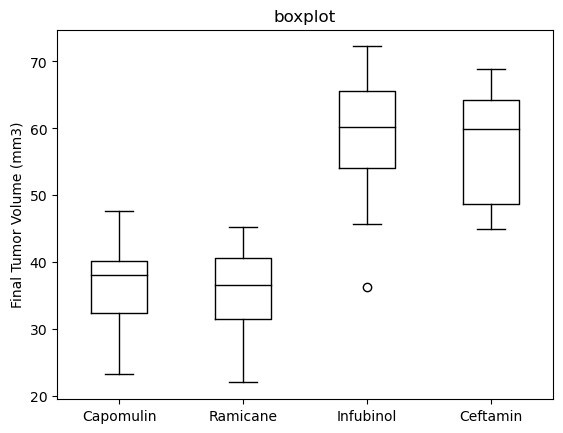

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Pandas dataframe
data = pd.DataFrame({"Ceftamin": Ceftamin_Tumor_Final_Values, "Infubinol": Infubinol_Tumor_Final_Values, "Capomulin": Capomulin_Tumor_Final_Values, "Ramicane": Ramicane_Tumor_Final_Values,})
data.head(50)
# Plot the dataframe
ax = data[['Capomulin', "Ramicane", 'Infubinol','Ceftamin']].plot(kind='box', title='boxplot', color ='black',)
plt.ylabel("Final Tumor Volume (mm3)")

# Display the plot
plt.show()

## Line and Scatter Plots

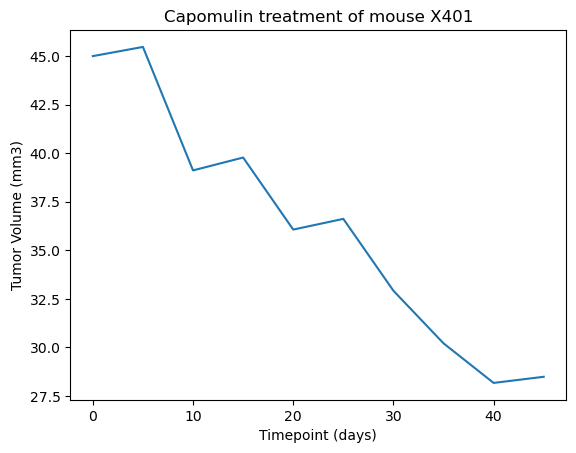

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_complete_mouse_data.loc[clean_complete_mouse_data['Mouse ID']== "x401", :]
x_axis = single_mouse['Timepoint']
y_axis = single_mouse['Tumor Volume (mm3)']
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse X401")
plt.plot(x_axis, y_axis)
plt.show()

#Ceftamin_Tumors = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']== "Ceftamin", :]

Text(0, 0.5, 'Average Tumor Volume (mm3)')

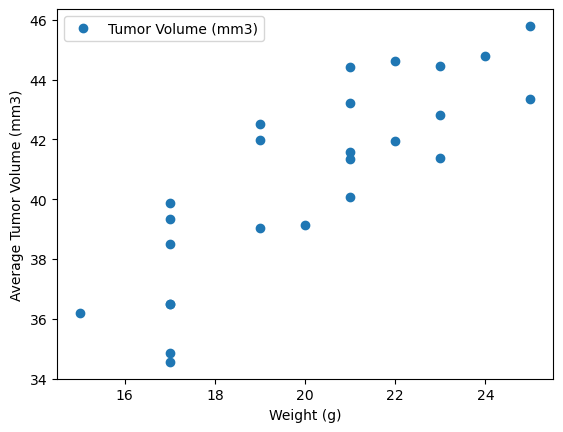

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_Mice = clean_complete_mouse_data.loc[clean_complete_mouse_data['Drug Regimen']== "Capomulin", :]

avg_size_by_weight_index = Capomulin_Mice.groupby("Mouse ID")[["Weight (g)", 'Tumor Volume (mm3)']].mean()

avg_size_by_weight = pd.DataFrame(avg_size_by_weight_index.set_index('Weight (g)'))
avg_size_by_weight

avg_size_by_weight.plot(style="o")
plt.ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

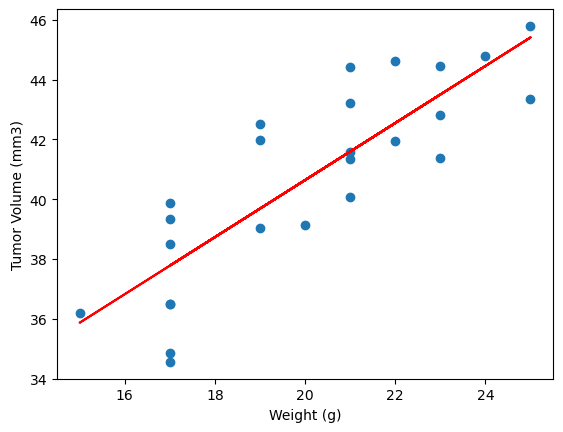

The correlation between mouse weight and the average tumor volume is 0.841936342469472


In [56]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_Mice = clean_complete_mouse_data.loc[clean_complete_mouse_data['Drug Regimen']== "Capomulin", :]

avg_size_by_weight_index = Capomulin_Mice.groupby("Mouse ID")[["Weight (g)", 'Tumor Volume (mm3)']].mean()

avg_size_by_weight = pd.DataFrame(avg_size_by_weight_index.set_index('Weight (g)'))
x_values = avg_size_by_weight.index
y_values = avg_size_by_weight['Tumor Volume (mm3)']
plt.scatter(x_values, y_values )

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")
